The problem I would like to solve using an RNN is predicting the price of a stock(Apple stock for my use but this can be extended to any stock) using the previous days stock prices. From the S&P 500 stock dataset I will be using the Apple stock the data from years 2013-2018. 

https://www.kaggle.com/camnugent/sandp500 

I will use the tensorflow keras library to solve this problem. 

In [319]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras.layers
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from keras.layers import SimpleRNN
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api
%matplotlib inline

In [320]:
dataset = pd.read_csv('AAPL_data.csv',parse_dates = ['date'])

In [321]:
dataset.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


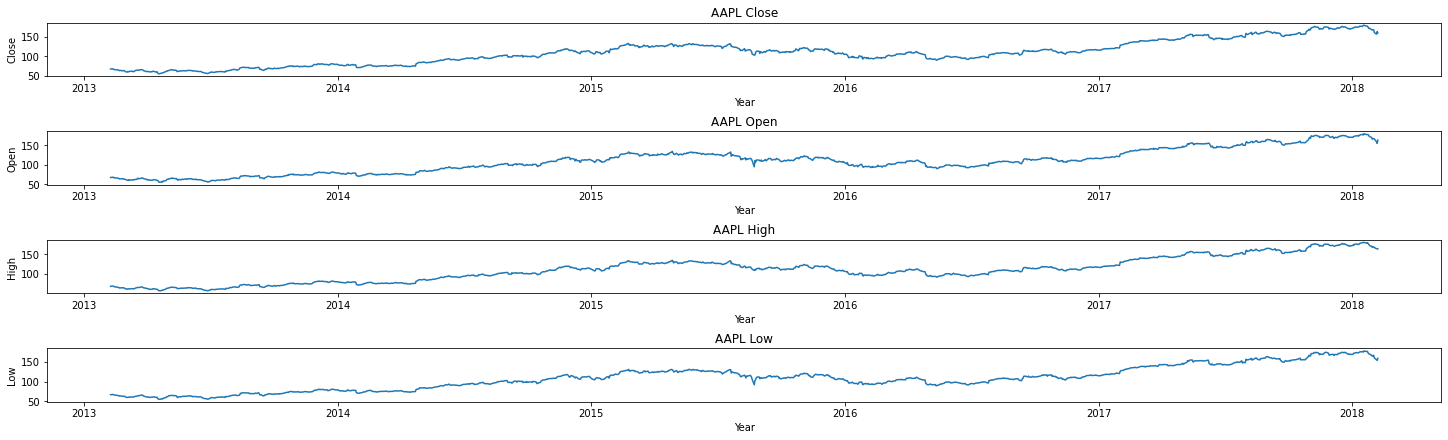

In [322]:
plt.rcParams['figure.constrained_layout.use'] = True
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize = (20,6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Close')
ax1.set_title('AAPL Close')
ax1.plot(dataset.date, dataset.close)
ax2.set_xlabel('Year')
ax2.set_ylabel('Open')
ax2.set_title('AAPL Open')
ax2.plot(dataset.date, dataset.open)
ax3.set_xlabel('Year')
ax3.set_ylabel('High')
ax3.set_title('AAPL High')
ax3.plot(dataset.date, dataset.high)
ax4.set_xlabel('Year')
ax4.set_ylabel('Low')
ax4.set_title('AAPL Low')
ax4.plot(dataset.date, dataset.low)
plt.show()

In [323]:
#Split train and test data
close = dataset.close.values.astype('float32')
close = close.reshape(len(close), 1)
train_size = int(len(close) * 0.70)
train_set = close[0:train_size, :]
test_set = close[train_size:, :]



In [324]:
#Need to normalize data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset['close'].values.reshape(-1,1))

In [325]:
prediction_days = 30

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x - prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [326]:
rnn = keras.models.Sequential()
#We use the default activation function of tanh for each layer 
#The first layer of the RNN, takes the shape of an input and a unit of 50
rnn.add((keras.layers.SimpleRNN(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1))))
# Dropout layer that will get rid of 20% of the network to readjust the weights
rnn.add(keras.layers.Dropout(0.2))

rnn.add(keras.layers.SimpleRNN(units = 50, return_sequences = True))
#Another dropout layer before the last input layer
rnn.add(keras.layers.Dropout(0.2))
#Last input layer, this time it does not return the alst sequence
rnn.add(keras.layers.SimpleRNN(units = 50))
#Finally the output layer
rnn.add(keras.layers.Dense(units = 1))
#Overall the simple RNN has 3 input layers and 2 layers to refresh the network throughout

In [327]:
#Accuracy metric used here is MeanSquaredError because this is a regression problem
rnn.compile(optimizer = 'adam',  loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanSquaredError()])

In [328]:
model = rnn.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
39/39 [==============================] - 2s 12ms/step - loss: 0.1382 - mean_squared_error: 0.1382
Epoch 2/100
39/39 [==============================] - 0s 12ms/step - loss: 0.0312 - mean_squared_error: 0.0312
Epoch 3/100
39/39 [==============================] - 1s 16ms/step - loss: 0.0183 - mean_squared_error: 0.0183
Epoch 4/100
39/39 [==============================] - 0s 12ms/step - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 5/100
39/39 [==============================] - 0s 11ms/step - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 6/100
39/39 [==============================] - 0s 11ms/step - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 7/100
39/39 [==============================] - 0s 11ms/step - loss: 0.0060 - mean_squared_error: 0.0060
Epoch 8/100
39/39 [==============================] - 0s 11ms/step - loss: 0.0042 - mean_squared_error: 0.0042
Epoch 9/100
39/39 [==============================] - 1s 13ms/step - loss: 0.0041 - mean_squared_error: 0.0041
Epoch 10/1

39/39 [==============================] - 0s 11ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 75/100
39/39 [==============================] - 0s 11ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 76/100
39/39 [==============================] - 0s 11ms/step - loss: 8.6505e-04 - mean_squared_error: 8.6505e-04
Epoch 77/100
39/39 [==============================] - 0s 11ms/step - loss: 9.4541e-04 - mean_squared_error: 9.4541e-04
Epoch 78/100
39/39 [==============================] - 0s 11ms/step - loss: 0.0010 - mean_squared_error: 0.0010 
Epoch 79/100
39/39 [==============================] - 0s 11ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 80/100
39/39 [==============================] - 0s 11ms/step - loss: 8.9882e-04 - mean_squared_error: 8.9882e-04
Epoch 81/100
39/39 [==============================] - 0s 11ms/step - loss: 0.0010 - mean_squared_error: 0.0010   
Epoch 82/100
39/39 [==============================] - 0s 12ms/step - loss: 0.0010 - mean_squared_

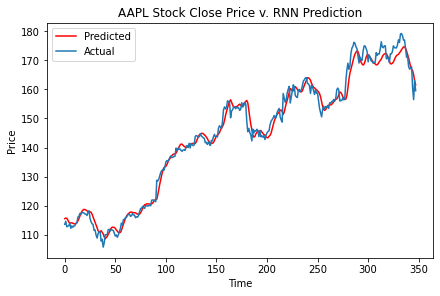

In [329]:
test_set = pd.DataFrame(test_set)
total_dataset = pd.concat((dataset['close'], test_set), axis=0)
model_inputs = total_dataset[len(total_dataset) - len(test_set) - 30:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

x_test = []
for x in range(30, len(model_inputs)):
    x_test.append(model_inputs[x-30:x, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] ,1))

predicted_prices = rnn.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

actual_prices = test_set.values
#Skip 30 steps to avoid funky model error at the start of the array
plt.plot(predicted_prices[30:], color = 'red')
plt.plot(actual_prices[30:])
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('AAPL Stock Close Price v. RNN Prediction')
plt.legend(['Predicted','Actual'])
plt.show()

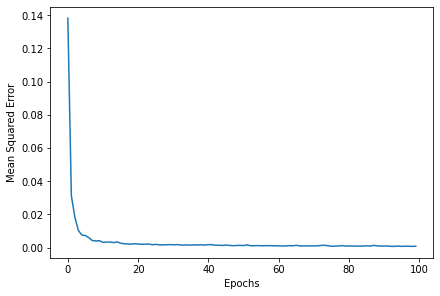

In [330]:
plt.plot((model.history['loss']))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

In [331]:
#Now implement the LSTM version

rnn_LSTM = keras.models.Sequential()

#Update the same simple RNN cell structure to LSTM 
rnn_LSTM.add((keras.layers.LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1))))
rnn_LSTM.add(keras.layers.Dropout(0.2))
rnn_LSTM.add(keras.layers.LSTM(units = 50, return_sequences = True))
rnn_LSTM.add(keras.layers.Dropout(0.2))
rnn_LSTM.add(keras.layers.SimpleRNN(units = 50))
rnn_LSTM.add(keras.layers.Dense(units = 1))

In [332]:
rnn_LSTM.compile(optimizer = 'adam',  loss = 'mean_squared_error')
model_LSTM = rnn_LSTM.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
39/39 [==============================] - 3s 19ms/step - loss: 0.0160
Epoch 2/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0045
Epoch 3/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0033
Epoch 4/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0028
Epoch 5/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0035
Epoch 6/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0023
Epoch 7/100
39/39 [==============================] - 1s 19ms/step - loss: 0.0020
Epoch 8/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0019
Epoch 9/100
39/39 [==============================] - 1s 19ms/step - loss: 0.0018
Epoch 10/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0016
Epoch 11/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0016
Epoch 12/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0018
Epoch 13/100
39/39 [=====

39/39 [==============================] - 1s 19ms/step - loss: 5.5429e-04
Epoch 98/100
39/39 [==============================] - 1s 18ms/step - loss: 6.4516e-04
Epoch 99/100
39/39 [==============================] - 1s 18ms/step - loss: 4.7817e-04
Epoch 100/100
39/39 [==============================] - 1s 18ms/step - loss: 4.8264e-04


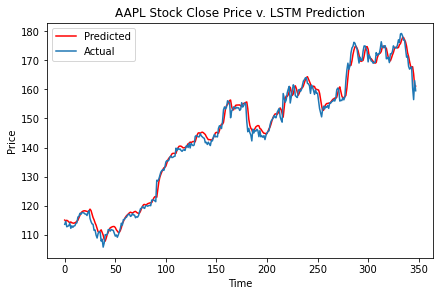

In [333]:
predicted_prices_LSTM = rnn_LSTM.predict(x_test)
predicted_prices_LSTM = scaler.inverse_transform(predicted_prices_LSTM)
actual_prices = test_set.values
plt.plot(predicted_prices_LSTM[30:], color = 'red')
plt.plot(actual_prices[30:])
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('AAPL Stock Close Price v. LSTM Prediction')
plt.legend(['Predicted','Actual'])
plt.show()

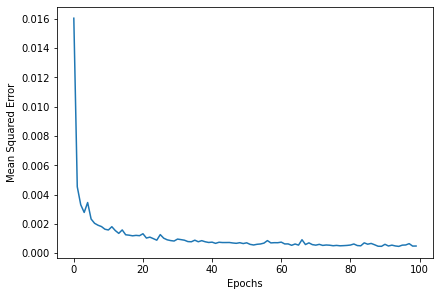

In [334]:
plt.plot((model_LSTM.history['loss']))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

From the two prediction v. actual graphs we can see that they both did a good job of predicting the stock price over days, with LSTM clearly having the better predictions. To understand the performance better, we can look at the second graphs on each RNN, the mean squared error. Here the clear winner is also the LSTM model, which had a very close score to 0 after about the 20th epoch, while the SimpleRNN had issues halfway through epochs and overall had a higher mean squared error. 

In [335]:
#Part 2

In [336]:
corpus = api.load('text8')  #http://mattmahoney.net/dc/textdata.html (first 100,000 words in wikipedia)
model = Word2Vec(corpus)  


In [337]:
input1 = input()
input2 = input()

print(f'Cosine similarity between {input1} and {input2} is {model.wv.similarity(input1, input2)}')

cat
dog
Cosine similarity between cat and dog is 0.7996753454208374


In [338]:
#implementing jaccard dissimilarity for part 2
def jaccard(str1, str2):
    intersection = len(list(set(str1).intersection(str2)))
    union = (len(str1) + len(str2)) - intersection
    return 1 - (float(intersection) / union)
print(f'Jaccard dissimarity(aka distance) between {input1} and {input2} is: {jaccard(input1, input2)}')

Jaccard dissimarity(aka distance) between cat and dog is: 1.0


Research paper used for jaccard distance: https://www.researchgate.net/publication/317248581_Using_of_Jaccard_Coefficient_for_Keywords_Similarity

The reason jaccard dissimilarity is a good measure to find the dissimlarity between two words because it divides the intersection of the two strings with the union of the two strings, finding how many members the two array-like structures share(string are just char arrays). For text purposes, when subtracted by 1, the jaccard will give us the dissimilarity between the two words, higher the score the more seperated the two words are.